In [1]:
import pandas as pd
from pandasai import SmartDataframe
from pandasai.llm.local_llm import LocalLLM
import matplotlib.pyplot as plt
# format pandas numbers
pd.options.display.float_format = '{:,.0f}'.format
#magic function for inline charts in notebook
%matplotlib inline
#For chart style from matplotlib 
plt.style.use('fivethirtyeight')

In [2]:
df = pd.read_csv("sales.csv")
df.head()

,productcategory,productsubcategory,saleterritory,State,Customer,OrderCount,OrderDate,Sales,Country,Territory
0,Clothing,Caps,Northwest,Wyoming,François Ferrier,1,5/31/2011 0:00,16,US,Casper
1,Clothing,Caps,Northwest,Washington,Richard Bready,1,5/31/2011 0:00,10,US,Seattle
2,Components,Mountain Frames,Northwest,Washington,Carolyn Farino,1,5/31/2011 0:00,715,US,Puyallup
3,Clothing,Jerseys,Northwest,Wyoming,François Ferrier,1,5/31/2011 0:00,58,US,Casper
4,Clothing,Jerseys,Northwest,Washington,Richard Bready,1,5/31/2011 0:00,58,US,Seattle


In [3]:
ollama_llm = LocalLLM(api_base="http://localhost:11434/v1", model="llama3")
df_llm = SmartDataframe(df, config={"llm": ollama_llm})

In [4]:
df_llm.chat('What is the total sales?')

{'type': 'number', 'value': 53603092.703814}


53603092.703814

In [6]:
df_llm.chat('What is the sale by productcategory?')

{'type': 'dataframe', 'value': productcategory
Accessories      303,515
Bikes         44,828,243
Clothing       1,037,437
Components     7,433,897
Name: Sales, dtype: float64}


,Sales
productcategory,
Accessories,"303,515"
Bikes,"44,828,243"
Clothing,"1,037,437"
Components,"7,433,897"


{'type': 'plot', 'value': 'D:/PandasAILLM/exports/charts/temp_chart.png'}


'D:/PandasAILLM/exports/charts/temp_chart.png'

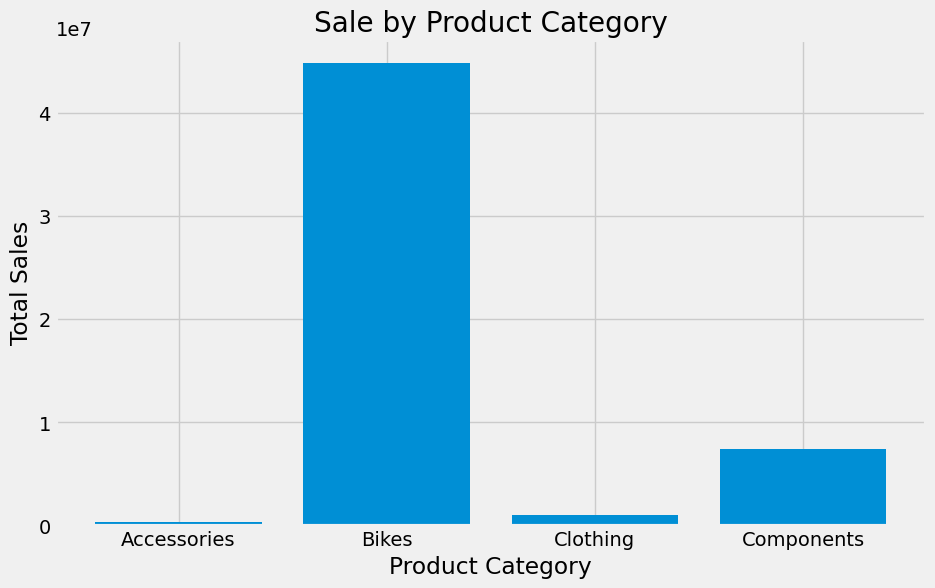

In [13]:
df_llm.chat('diplay the sale by productcategory?')